# Uebung 2

# 2) Eigengesichter

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import tarfile
import os.path
import urllib.request
import skimage

## 2a) Bilder herunterladen und die meisten aussuchen

In [6]:
filename = "lfw-funneled.tgz"
url = "http://vis-www.cs.umass.edu/lfw/" + filename
if not os.path.isfile(filename):
    urllib.request.urlretrieve(url, filename)
    dateDownloaded = !date
    print(dateDownloaded)

['Fr 18. Nov 11:29:22 CET 2016']


In [7]:
tar = tarfile.open(filename)
tar.extractall()
tar.close()
foldername = "lfw_funneled"

In [8]:
persons = {}
for personName in os.listdir(foldername):
    current_person = foldername + "/" + personName
    if os.path.isdir(current_person):
        if len(os.listdir(current_person)) >= 70:
               persons.update({personName: [current_person +"/"+item for item in os.listdir(current_person)] })
persons.keys()

dict_keys(['Hugo_Chavez', 'George_W_Bush', 'Tony_Blair', 'Colin_Powell', 'Gerhard_Schroeder', 'Donald_Rumsfeld', 'Ariel_Sharon'])

## 2b) Bilder einlesen und verkleinern

In [24]:
from skimage import io
from skimage import transform

resized_images = []
resized_names = []
resized_last_images = []
resized_last_names = []

for person_name, person in zip(persons.keys(), persons.values()):
    path = person.copy()
    #del path[-1]
    for picture_path in path:
        picture = io.imread(picture_path,  as_grey=True)
        resized_image = transform.resize(picture, (32, 32)).flatten()
        if not picture_path == path[-1]:
            resized_images.append(resized_image)
            resized_names.append(person_name)
        else:
            resized_last_images.append(resized_image)
            resized_last_names.append(person_name)

resized_images = np.array(resized_images)
resized_names = np.array(resized_names)
resized_last_images = np.array(resized_last_images)
resized_last_names = np.array(resized_last_names)
        
resized_images.shape, resized_names.shape, resized_last_images.shape, resized_last_names.shape

((1281, 1024), (1281,), (7, 1024), (7,))

## 2c)  Hauptkomponentenanalyse anwenden

In [11]:
U, D, Vt = np.linalg.svd(resized_images)
U.shape, D.shape, Vt.shape

((1281, 1281), (1281,), (3072, 3072))

Die ersten 150 Eigenwerte im Diagramm darstellen

Populating the interactive namespace from numpy and matplotlib


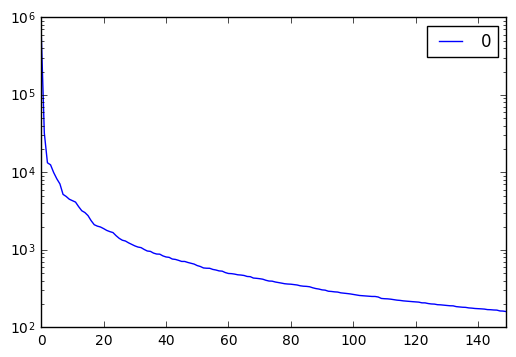

In [12]:
eigenvalues = np.square(D)
eigen_values_dataframe = pd.DataFrame(eigenvalues[0:150])

%pylab inline
eigen_values_dataframe.plot(logy=True)

Interpretation der Ergebnisse:



# Konfiguration

In [15]:
%load_ext version_information
%version_information numpy, pandas, matplotlib, skimage

The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information


Software versions
Python 3.5.2 64bit [GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
IPython 5.1.0
OS Linux 4.2.0 27 generic x86_64 with debian jessie sid
numpy 1.11.1
pandas 0.18.1
matplotlib 1.5.3
skimage 0.12.3
Fri Nov 18 11:35:26 2016 CET